In [1]:

ads = [
    ("A1", 4, 20),
    ("A2", 1, 10),
    ("A3", 1, 40),
    ("A4", 1, 30),
]

ads.sort(key=lambda x: x[2], reverse=True)
max_dead = max(a[1] for a in ads)
slots = [None]*(max_dead+1)

profit = 0
schedule = []

for ad in ads:
    id_, deadline, profit_val = ad
    for t in range(deadline, 0, -1):
        if slots[t] is None:
            slots[t] = id_
            schedule.append(id_)
            profit += profit_val
            break

print("Scheduled Ads:", schedule)
print("Total Profit:", profit)


Scheduled Ads: ['A3', 'A1']
Total Profit: 60


In [2]:
# ---------------- KNAPSACK 0/1 ----------------

weights = [10, 20, 30]
values  = [60, 100, 120]
W = 50
n = len(values)

dp = [[0]*(W+1) for _ in range(n+1)]

for i in range(1, n+1):
    for w in range(1, W+1):
        if weights[i-1] <= w:
            dp[i][w] = max(values[i-1] + dp[i-1][w-weights[i-1]], dp[i-1][w])
        else:
            dp[i][w] = dp[i-1][w]

print("Max Profit:", dp[n][W])


Max Profit: 220


In [3]:
# ---------------- SUDOKU SOLVER ----------------

board = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9],
]

def valid(board, r, c, num):
    if num in board[r]: return False
    if num in [board[i][c] for i in range(9)]: return False
    br, bc = (r//3)*3, (c//3)*3
    for i in range(3):
        for j in range(3):
            if board[br+i][bc+j] == num:
                return False
    return True

def solve(board):
    for r in range(9):
        for c in range(9):
            if board[r][c] == 0:
                for num in range(1,10):
                    if valid(board,r,c,num):
                        board[r][c] = num
                        if solve(board): return True
                        board[r][c] = 0
                return False
    return True

solve(board)
for row in board: print(row)


[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


In [4]:
import math

charset = 26
length = 6
attempts_per_sec = 1e6

total = charset**length
time_sec = total / attempts_per_sec

print("Total combinations:", total)
print("Time (seconds):", time_sec)
print("Time (hours):", time_sec/3600)


Total combinations: 308915776
Time (seconds): 308.915776
Time (hours): 0.08580993777777778


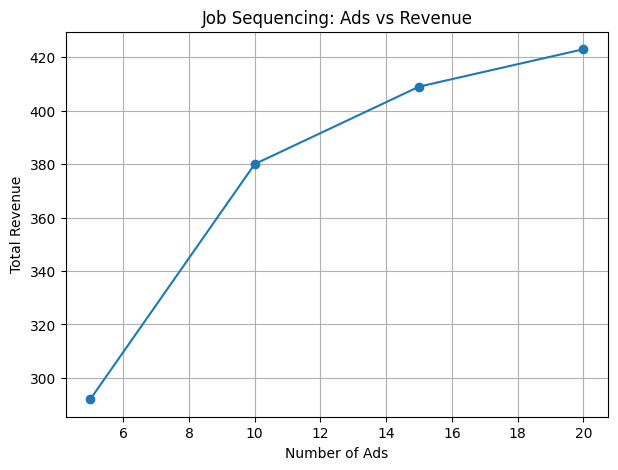

In [6]:
import random
import matplotlib.pyplot as plt

# ==== LAB 2: Job Sequencing Revenue Graph ====

profits = []
ads_list = []

for n in range(5,25,5):
    ads = [(f"A{i}", random.randint(1,5), random.randint(10,100)) for i in range(n)]
    ads.sort(key=lambda x:x[2], reverse=True)

    max_dead = max(a[1] for a in ads)
    slots = [None]*(max_dead+1)
    revenue = 0
    for ad in ads:
        id_, d, p = ad
        for t in range(d,0,-1):
            if slots[t] is None:
                slots[t]=id_
                revenue += p
                break
    profits.append(revenue)
    ads_list.append(n)

plt.figure(figsize=(7,5))
plt.plot(ads_list, profits, marker='o')
plt.xlabel("Number of Ads")
plt.ylabel("Total Revenue")
plt.title("Job Sequencing: Ads vs Revenue")
plt.grid(True)
plt.show()

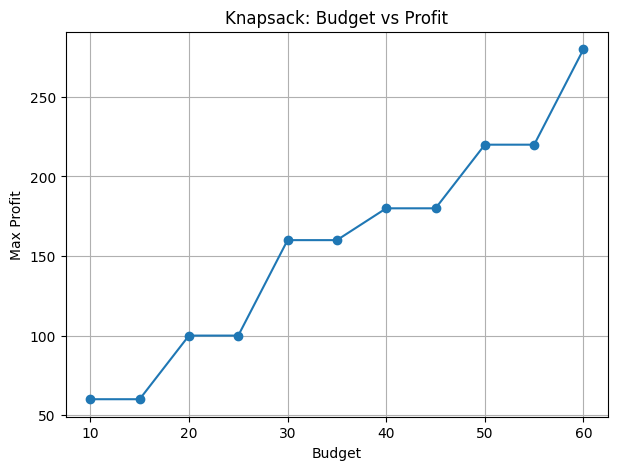

In [7]:


weights = [10,20,30]
values  = [60,100,120]

budgets = list(range(10,61,5))
profits = []

for W in budgets:
    n=len(values)
    dp = [[0]*(W+1) for _ in range(n+1)]
    for i in range(1,n+1):
        for w in range(1,W+1):
            if weights[i-1] <= w:
                dp[i][w] = max(values[i-1] + dp[i-1][w-weights[i-1]],
                                dp[i-1][w])
            else:
                dp[i][w] = dp[i-1][w]
    profits.append(dp[n][W])

plt.figure(figsize=(7,5))
plt.plot(budgets, profits, marker='o')
plt.xlabel("Budget")
plt.ylabel("Max Profit")
plt.title("Knapsack: Budget vs Profit")
plt.grid(True)
plt.show()


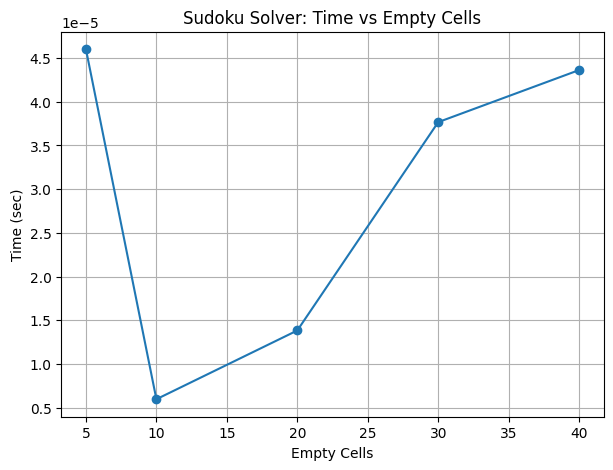

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ==== LAB 2: Sudoku Time vs Empty Cells ====

def valid(board, r, c, num):
    if num in board[r]: return False
    if num in [board[i][c] for i in range(9)]: return False
    br, bc = (r//3)*3, (c//3)*3
    for i in range(3):
        for j in range(3):
            if board[br+i][bc+j] == num:
                return False
    return True

def solve(board):
    for r in range(9):
        for c in range(9):
            if board[r][c]==0:
                for num in range(1,10):
                    if valid(board,r,c,num):
                        board[r][c]=num
                        if solve(board): return True
                        board[r][c]=0
                return False
    return True

empty_cells = [5,10,20,30,40]
times = []

# Assuming time_function is defined elsewhere or will be defined. For now, it's a placeholder.
def time_function(func, *args):
    import time
    start = time.time()
    func(*args)
    end = time.time()
    return end - start

for e in empty_cells:
    board = np.random.randint(1,10,(9,9)).tolist()
    # make e cells empty
    for _ in range(e):
        board[random.randint(0,8)][random.randint(0,8)] = 0

    t = time_function(solve, board)
    times.append(t)

plt.figure(figsize=(7,5))
plt.plot(empty_cells, times, marker='o')
plt.xlabel("Empty Cells")
plt.ylabel("Time (sec)")
plt.title("Sudoku Solver: Time vs Empty Cells")
plt.grid(True)
plt.show()

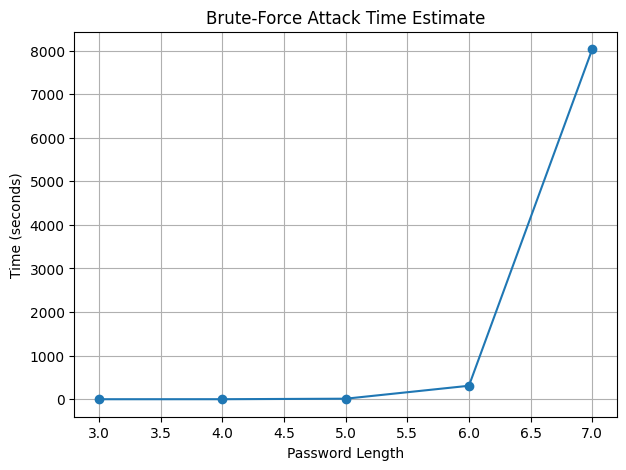

In [10]:


charset = 26
lengths = [3,4,5,6,7]
attempts_per_sec = 1e6

times = []

for L in lengths:
    total = charset**L
    t = total / attempts_per_sec
    times.append(t)

plt.figure(figsize=(7,5))
plt.plot(lengths, times, marker='o')
plt.xlabel("Password Length")
plt.ylabel("Time (seconds)")
plt.title("Brute-Force Attack Time Estimate")
plt.grid(True)
plt.show()
